In [1]:
# Example 1, Page 298 - Numerical Analysis, Burden, Faires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def RungeKuttaFehlbergMethod(a, b, alpha, TOL, hmax, hmin):
    array_t = []
    array_w = []
    
    t = a
    w = alpha
    h = hmax
    FLAG = 1
    
    array_t.append(t)
    array_w.append(w)

    while FLAG == 1:
        K1 = h*F(t,w)
        K2 = h*F(t+(1/4)*h, w+(1/4)*K1)
        K3 = h*F(t+(3/8)*h, w+(3/32)*K1+(9/32)*K2)
        K4 = h*F(t+(12/13)*h, w+(1932/2197)*K1-(7200/2197)*K2+(7296/2197)*K3)
        K5 = h*F(t+h, w+(439/216)*K1-8*K2+(3680/513)*K3-(845/4104)*K4)
        K6 = h*F(t+(1/2)*h, w-(8/27)*K1+2*K2-(3544/2565)*K3+(1859/4104)*K4-(11/40)*K5)
        
        R = (1/h)*abs((1/360)*K1-(128/4275)*K3-(2197/75240)*K4+(1/50)*K5+(2/55)*K6)
        
        if R <= TOL:
            t = t + h
            w = w + (25/216)*K1 + (1408/2565)*K3 + (2197/4104)*K4 - (1/5)*K5
        
            array_t.append(t)
            array_w.append(w)
        
        delta = 0.84*pow((TOL/R), (1/4))
        
        if delta <= 0.1:
            h = 0.1*h
        elif delta >= 4:
            h = 4*h
        else:
            h = delta*h
        
        if h > hmax:
            h = hmax

        if t >= b:
            FLAG = 0
        elif t+h > b:
            h = b-t
        elif h < hmin:
            FLAG = 0
        
    return array_t, array_w

In [4]:
def F(t, y):
    return y - t**2 + 1

In [5]:
def Y(t):
    return (t+1)**2 - 0.5*math.exp(t)

In [6]:
r, w = RungeKuttaFehlbergMethod(0, 2, 0.5, pow(10,-5), 0.25, 0.01)

In [7]:
y = []
for t in r:
    y.append(Y(t))

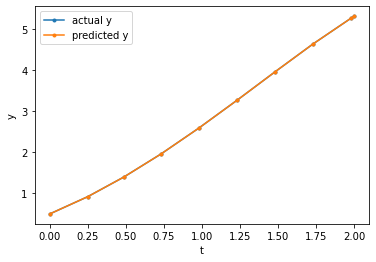

In [8]:
plt.plot(r, y, marker = '.', label = 'actual y')
plt.plot(r, w, marker = '.', label = 'predicted y')

plt.xlabel("t")
plt.ylabel("y")
plt.legend()

plt.show()